In [ ]:
from google.colab import files
uploaded = files.upload()

Saving log.csv to log.csv


In [ ]:
import pandas as pd

# Use the 'on_bad_lines='skip'' argument to skip problematic rows
df = pd.read_csv('log.csv', on_bad_lines='skip')

print(df)

df.head()


      07-Nov-2009 20:11:01.863 queries: info: client 7.204.241.161#52985: query: 181.190.75.3.in-addr.arpa IN PTR +
0      07-Nov-2009 20:11:01.893 queries: info: client...                                                           
1      07-Nov-2009 20:11:02.326 general: warning: che...                                                           
2      07-Nov-2009 20:11:02.326 general: warning: che...                                                           
3      07-Nov-2009 20:11:02.326 general: warning: che...                                                           
4      07-Nov-2009 20:11:02.326 general: warning: che...                                                           
...                                                  ...                                                           
63518  11-Nov-2011 16:05:39.763 queries: info: client...                                                           
63519  11-Nov-2011 16:05:44.766 queries: info: client...                

,07-Nov-2009 20:11:01.863 queries: info: client 7.204.241.161#52985: query: 181.190.75.3.in-addr.arpa IN PTR +
0,07-Nov-2009 20:11:01.893 queries: info: client...
1,07-Nov-2009 20:11:02.326 general: warning: che...
2,07-Nov-2009 20:11:02.326 general: warning: che...
3,07-Nov-2009 20:11:02.326 general: warning: che...
4,07-Nov-2009 20:11:02.326 general: warning: che...


 Data Pre-processing a. Handling Null Values

In [ ]:
# Check for null values
print(df.isnull().sum())

df.fillna("Unknown", inplace=True)


07-Nov-2009 20:11:01.863 queries: info: client 7.204.241.161#52985: query: 181.190.75.3.in-addr.arpa IN PTR +    0
dtype: int64


data reduction

In [ ]:
import pandas as pd
import re

# Load DNS log data
file_path = 'log.csv'
data = pd.read_csv(file_path,on_bad_lines='skip', header=None, names=['log_entry'])

# Define a regular expression pattern to parse DNS log entries
pattern = r'(?P<date>\d{2}-\w{3}-\d{4})\s(?P<time>\d{2}:\d{2}:\d{2}\.\d{3})\s(?P<category>\w+):\s(?P<type>\w+):\s(?P<message>.+)'

# Apply the pattern to each log entry to extract data into separate columns
data_parsed = data['log_entry'].str.extract(pattern)

# Display the parsed dataset
print(data_parsed.head())


          date          time category     type  \
0  07-Nov-2009  20:11:01.863  queries     info   
1  07-Nov-2009  20:11:01.893  queries     info   
2  07-Nov-2009  20:11:02.326  general  warning   
3  07-Nov-2009  20:11:02.326  general  warning   
4  07-Nov-2009  20:11:02.326  general  warning   

                                             message  
0  client 7.204.241.161#52985: query: 181.190.75....  
1  client 3.75.190.181#54339: query: jabber.usma....  
2  checkhints: unable to find root NS 'cluster2.h...  
3  checkhints: extra NS 'A.ROOT-SERVERS.NET' in h...  
4  checkhints: extra NS 'B.ROOT-SERVERS.NET' in h...  


Extract additinal details

In [ ]:
# Extract client IP and query information from the message column
client_pattern = r'client\s(?P<client_ip>\d+\.\d+\.\d+\.\d+)'
query_pattern = r'query:\s(?P<query>[\w\.\-]+)'

data_parsed['client_ip'] = data_parsed['message'].str.extract(client_pattern)
data_parsed['query'] = data_parsed['message'].str.extract(query_pattern)

# Drop rows with missing values in essential fields
data_parsed.dropna(subset=['date', 'time', 'category', 'type'], inplace=True)

# Show the dataset after parsing additional details
print(data_parsed.head())


          date          time category     type  \
0  07-Nov-2009  20:11:01.863  queries     info   
1  07-Nov-2009  20:11:01.893  queries     info   
2  07-Nov-2009  20:11:02.326  general  warning   
3  07-Nov-2009  20:11:02.326  general  warning   
4  07-Nov-2009  20:11:02.326  general  warning   

                                             message      client_ip  \
0  client 7.204.241.161#52985: query: 181.190.75....  7.204.241.161   
1  client 3.75.190.181#54339: query: jabber.usma....   3.75.190.181   
2  checkhints: unable to find root NS 'cluster2.h...            NaN   
3  checkhints: extra NS 'A.ROOT-SERVERS.NET' in h...            NaN   
4  checkhints: extra NS 'B.ROOT-SERVERS.NET' in h...            NaN   

                       query  
0  181.190.75.3.in-addr.arpa  
1        jabber.usma.bluenet  
2                        NaN  
3                        NaN  
4                        NaN  


In [ ]:
# Extract date, time, category, type, and message from log entries
data_parsed = data['log_entry'].str.extract(pattern)

# Handle missing values: Drop rows with critical missing fields
data_parsed.dropna(subset=['date', 'time', 'category', 'type'], inplace=True)

# Fill missing values in the 'message' column with a default placeholder if needed
data_parsed['message'].fillna("No Message", inplace=True)

# Extract additional details from the 'message' field for more granular features
client_pattern = r'client\s(?P<client_ip>\d+\.\d+\.\d+\.\d+)'
query_pattern = r'query:\s(?P<query>[\w\.\-]+)'

data_parsed['client_ip'] = data_parsed['message'].str.extract(client_pattern)
data_parsed['query'] = data_parsed['message'].str.extract(query_pattern)

# Handle missing values for new extracted columns
data_parsed['client_ip'].fillna("Unknown", inplace=True)
data_parsed['query'].fillna("Unknown", inplace=True)

# Convert date and time into a single datetime column for consistency
data_parsed['datetime'] = pd.to_datetime(data_parsed['date'] + ' ' + data_parsed['time'], errors='coerce')

# Drop the original date and time columns if datetime is sufficient
data_parsed.drop(columns=['date', 'time'], inplace=True)

# Display the dataset after parsing
print(data_parsed.head())

<ipython-input-7-8537da4e612e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_parsed['message'].fillna("No Message", inplace=True)
<ipython-input-7-8537da4e612e>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

  category     type                                            message  \
0  queries     info  client 7.204.241.161#52985: query: 181.190.75....   
1  queries     info  client 3.75.190.181#54339: query: jabber.usma....   
2  general  warning  checkhints: unable to find root NS 'cluster2.h...   
3  general  warning  checkhints: extra NS 'A.ROOT-SERVERS.NET' in h...   
4  general  warning  checkhints: extra NS 'B.ROOT-SERVERS.NET' in h...   

       client_ip                      query                datetime  
0  7.204.241.161  181.190.75.3.in-addr.arpa 2009-11-07 20:11:01.863  
1   3.75.190.181        jabber.usma.bluenet 2009-11-07 20:11:01.893  
2        Unknown                    Unknown 2009-11-07 20:11:02.326  
3        Unknown                    Unknown 2009-11-07 20:11:02.326  
4        Unknown                    Unknown 2009-11-07 20:11:02.326  


Data Encoding for Machine Learning


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoders = {}
for column in ['category', 'type', 'client_ip', 'query']:
    le = LabelEncoder()
    data_parsed[column] = le.fit_transform(data_parsed[column].astype(str))
    label_encoders[column] = le  # Save encoders for potential inverse transformation


Feature and Target Selection


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical columns
label_encoders = {}
for column in ['category', 'type', 'client_ip', 'query']:
    le = LabelEncoder()
    data_parsed[column] = le.fit_transform(data_parsed[column].fillna('Unknown'))
    label_encoders[column] = le  # Save label encoder for potential inverse transformations

# Define features (X) and target variable (y)
X = data_parsed[['category', 'client_ip', 'query']]  # Features
y = data_parsed['type']  # Target
print(X)
print(y)


       category  client_ip  query
0             4         32    519
1             4         29   3275
2             1         33    976
3             1         33    976
4             1         33    976
...         ...        ...    ...
63519         4         28    933
63520         4         28    933
63521         4         28    933
63522         4         28    901
63523         4         28    901

[62849 rows x 3 columns]
0        1
1        1
2        3
3        3
4        3
        ..
63519    1
63520    1
63521    1
63522    1
63523    1
Name: type, Length: 62849, dtype: int64


4. Data Splitting and Cross-Validation
python
Copy code


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
print(y_train)

       category  client_ip  query
62744         4         31    355
43537         4         32    589
40039         4         32    710
3963          4          6   3604
33274         4         29    466
...         ...        ...    ...
63245         4          1   4276
38450         4         29   2698
867           4         32   4575
15888         4          6   3275
56980         4         32   4120

[43994 rows x 3 columns]
62744    1
43537    1
40039    1
3963     1
33274    1
        ..
63245    1
38450    1
867      1
15888    1
56980    1
Name: type, Length: 43994, dtype: int64


5. Train and Compare Classifier Models


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train, predict, and evaluate each model
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix and accuracy
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


Decision Tree Cross-Validation Accuracy: 0.9938855293156361

Decision Tree Accuracy: 0.9939538583929992
Decision Tree Confusion Matrix:
[[    0     1     0     0]
 [    0 18733     0     0]
 [    0    25     8     0]
 [    0    88     0     0]]

Random Forest Cross-Validation Accuracy: 0.9938855293156361

Random Forest Accuracy: 0.9939538583929992
Random Forest Confusion Matrix:
[[    0     1     0     0]
 [    0 18733     0     0]
 [    0    25     8     0]
 [    0    88     0     0]]

KNN Cross-Validation Accuracy: 0.9854300230081012

KNN Accuracy: 0.9939008220631133
KNN Confusion Matrix:
[[    0     1     0     0]
 [    0 18732     1     0]
 [    0    25     8     0]
 [    0    88     0     0]]



6. Confusion Matrix Visualization

logical regretion


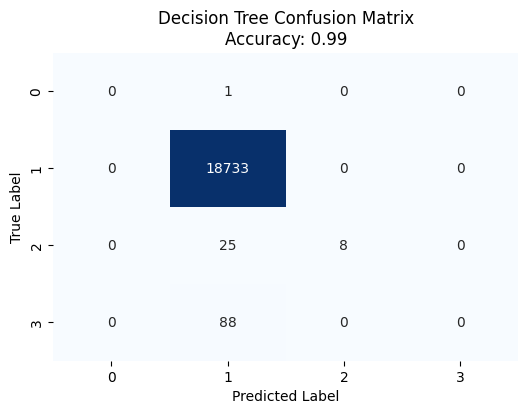

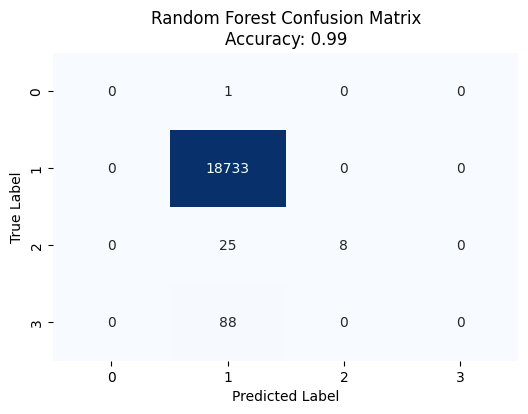

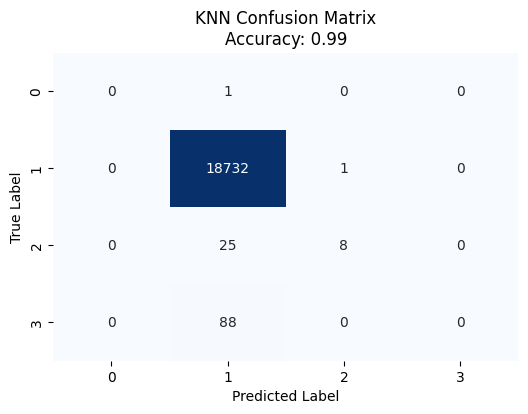

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming models dictionary and X_test, y_test are already defined

for name, model in models.items():
    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute confusion matrix and accuracy score
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix\nAccuracy: {accuracy:.2f}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


<ipython-input-12-7a0fadf6b000>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=data_parsed, palette="viridis")


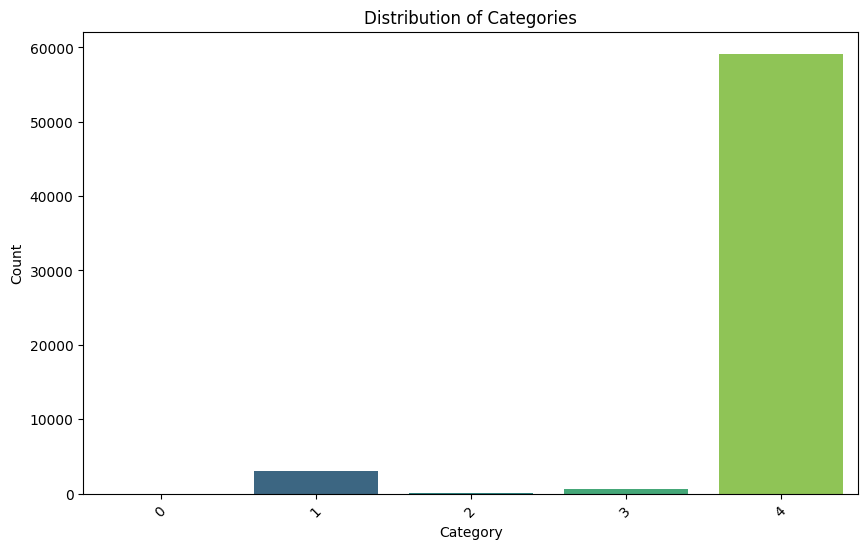

In [ ]:
# Ensure datetime is parsed for any time-based visualizations
data_parsed['datetime'] = pd.to_datetime(data_parsed['datetime'], errors='coerce')

# Step 1: Distribution of Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=data_parsed, palette="viridis")
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-cffa6aa3c1d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clients.values, y=top_clients.index, palette="magma")


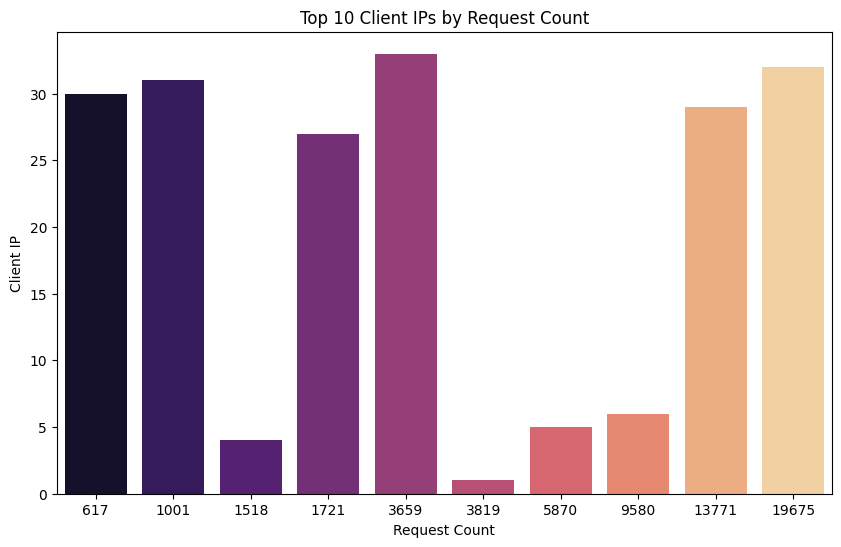

In [ ]:
# Step 3: Top 10 Client IPs by Request Count
top_clients = data_parsed['client_ip'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_clients.values, y=top_clients.index, palette="magma")
plt.title("Top 10 Client IPs by Request Count")
plt.xlabel("Request Count")
plt.ylabel("Client IP")
plt.show()

<ipython-input-14-a3fa2e040fe5>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_parsed.set_index('datetime').resample('H').size().plot(color="steelblue")


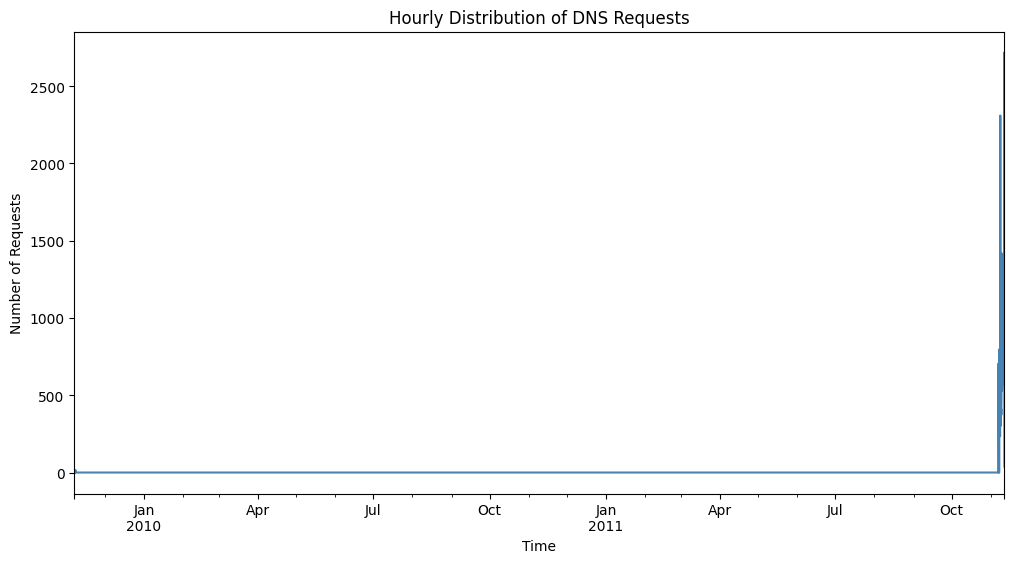

In [ ]:

# Step 4: Distribution of Requests Over Time
plt.figure(figsize=(12, 6))
data_parsed.set_index('datetime').resample('H').size().plot(color="steelblue")
plt.title("Hourly Distribution of DNS Requests")
plt.xlabel("Time")
plt.ylabel("Number of Requests")
plt.show()


<ipython-input-15-f445ef152e79>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_warning', data=data_parsed, palette=["#ff6347", "#4682b4"])
<ipython-input-15-f445ef152e79>:6: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(x='is_warning', data=data_parsed, palette=["#ff6347", "#4682b4"])


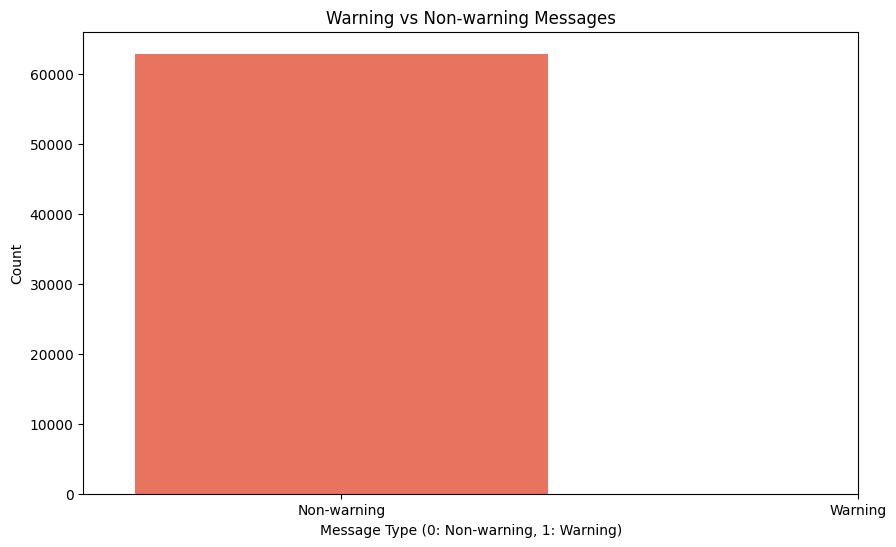

In [ ]:

# Step 5: Message Type Distribution (Error vs Non-error)
# Creating a new column indicating if the message is a warning or info based on 'type'
data_parsed['is_warning'] = data_parsed['type'].apply(lambda x: 1 if x == 'warning' else 0)

plt.figure(figsize=(10, 6))
sns.countplot(x='is_warning', data=data_parsed, palette=["#ff6347", "#4682b4"])
plt.title("Warning vs Non-warning Messages")
plt.xlabel("Message Type (0: Non-warning, 1: Warning)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Non-warning", "Warning"])
plt.show()

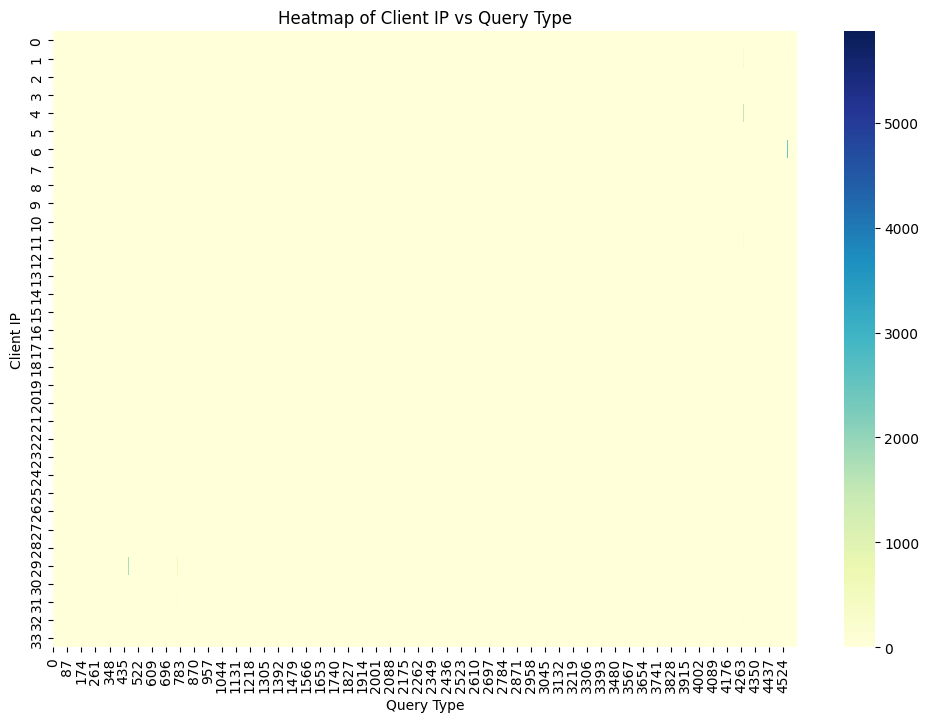

In [ ]:

# Step 6: Heatmap of Client IP vs Query Type
# Cross-tabulation of client IP and query types to create a heatmap
ip_query_heatmap = pd.crosstab(data_parsed['client_ip'], data_parsed['query'])

plt.figure(figsize=(12, 8))
sns.heatmap(ip_query_heatmap, cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Client IP vs Query Type")
plt.xlabel("Query Type")
plt.ylabel("Client IP")
plt.show()